Freelance заказ, клиенту требуется собрать все данные о калорийности продуктов со страницы сайта

In [25]:
!pip install beautifulsoup4 requests lxml

In [26]:
import requests
from bs4 import BeautifulSoup
import csv
import random
from time import sleep
import json

In [27]:
url = 'https://health-diet.ru/table_calorie/?utm_source=leftMenu&utm_medium=table_calorie'
url

'https://health-diet.ru/table_calorie/?utm_source=leftMenu&utm_medium=table_calorie'

In [28]:
request = requests.get(url)
request

<Response [200]>

In [29]:
src = request.text
# src

In [6]:
with open('health-diet.html', 'w', encoding='utf-8') as file:
    file.write(src)
file

<_io.TextIOWrapper name='health-diet.html' mode='w' encoding='utf-8'>

In [7]:
with open('health-diet.html', encoding='utf-8') as file:
    src = file.read()

In [30]:
# src

In [31]:
soup = BeautifulSoup(src, 'lxml')
# soup

In [10]:
all_products_tags = soup.find_all(class_='mzr-tc-group-item-href')
all_products_tags

[<a class="mzr-tc-group-item-href" href="/base_of_food/food_24507/" title="Химический состав продукта: Баранина и дичь">Баранина и дичь</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24523/" title="Химический состав продукта: Бобовые">Бобовые</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24509/" title="Химический состав продукта: Вода и напитки">Вода и напитки</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24502/" title="Химический состав продукта: Говядина и телятина">Говядина и телятина</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24513/" title="Химический состав продукта: Грибы">Грибы</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24526/" title="Химический состав продукта: Детское питание">Детское питание</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24515/" title="Химический состав продукта: Жиры и масла">Жиры и масла</a>,
 <a class="mzr-tc-group-item-href" href="/base_of

In [19]:
# product_title_calories_json = {}
# with open('product_title_calories_json.json', 'w', encoding='utf-8') as file:
#     json.dump(product_title_calories_json, file, indent=4, ensure_ascii=False)

In [ ]:
for hyperlink in all_products_tags:
        href = 'https://health-diet.ru' + hyperlink['href']
        name = hyperlink.text

        replace_this_characters = [',', ' ', '-', "'"] # хочу заменить такие чары на "_"
        for char in replace_this_characters:
            if char in name:
                name = name.replace(char, '_')
        
        request = requests.get(href)
        src = request.text # full html code, in string format, stored here
    
        soup = BeautifulSoup(src, 'lxml')

        # Проверяем на наличие таблицы, вдруг выйдет "страница не наайдена"
        alert = soup.find(class_='uk-alert-danger')
        if alert is not None:
            continue
    
        theads = soup.find(class_='mzr-tc-group-table').find('thead').find_all('th')
        product = theads[0].text
        calories = theads[1].text

        with open('product_title_calories_csv.csv', 'w', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(
                [product, 
                 calories]
            )
            
        tbody = soup.find(class_='mzr-tc-group-table').find('tbody').find_all('tr')

        product_title_calories = []
        for tr in tbody:
            tds = tr.find_all('td')
            title = tds[0].find('a').text
            calories = tds[1].text

            product_title_calories.append({
                'Title': title,
                'Calories': calories
            })

            with open('product_title_calories_csv.csv', 'a', encoding='utf-8') as file:
                writer = csv.writer(file)
                writer.writerow(
                    [title, 
                     calories
                    ]
                )
            
        with open('product_title_calories_json.json', 'a', encoding='utf-8') as file:
                json.dump(product_title_calories, file, indent=4, ensure_ascii=False)

результаты хранятся в файлах `product_title_calories_csv.csv` и `product_title_calories_json.json`.

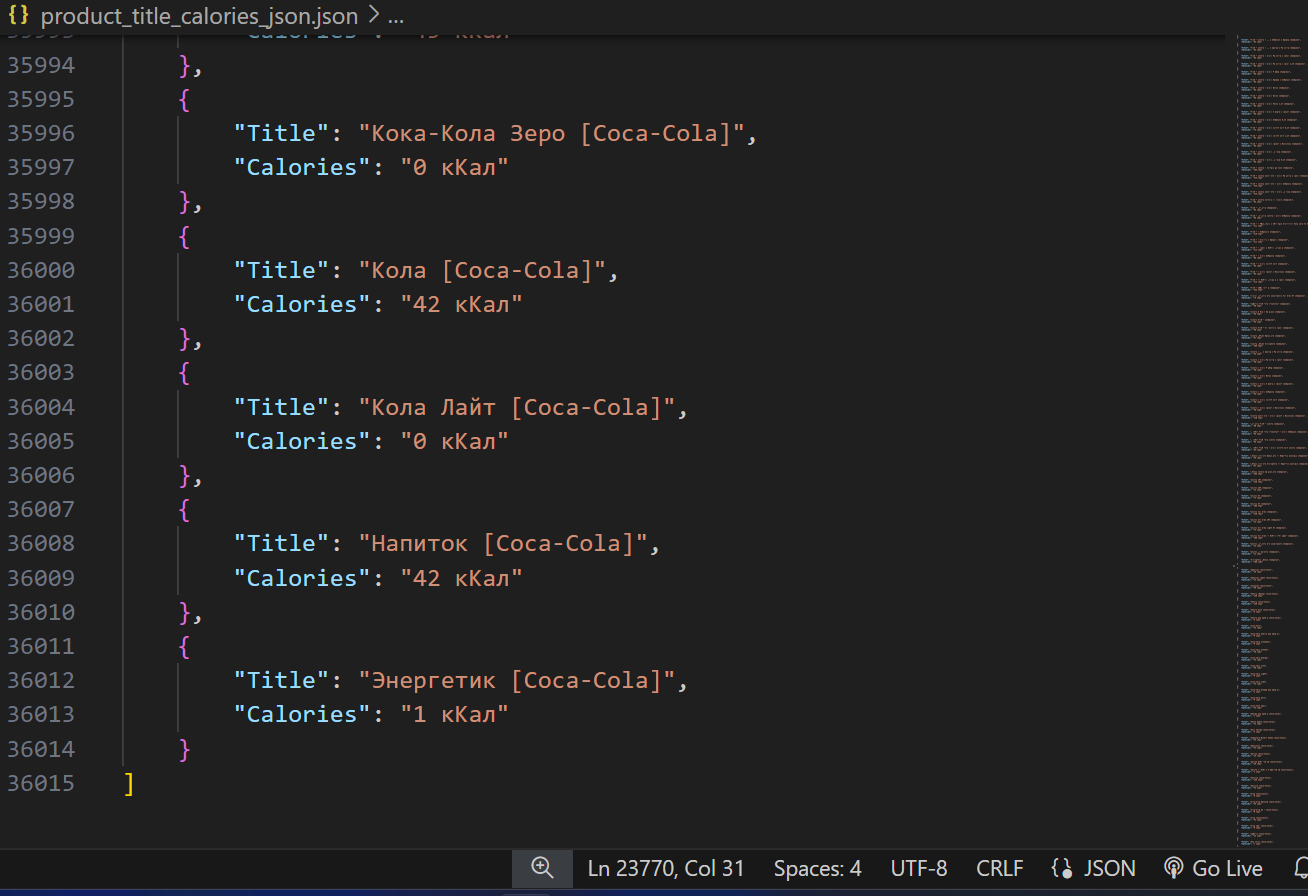

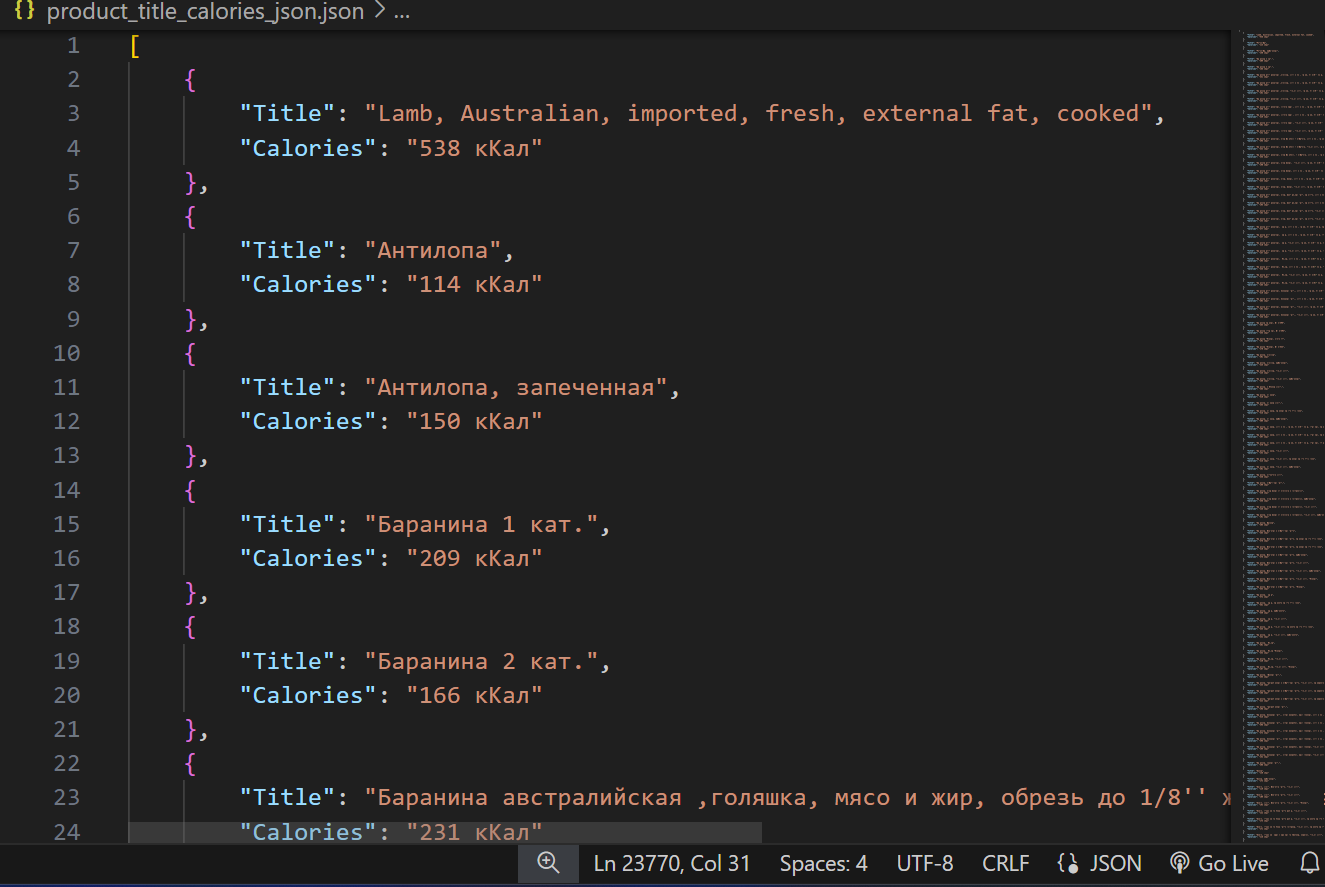

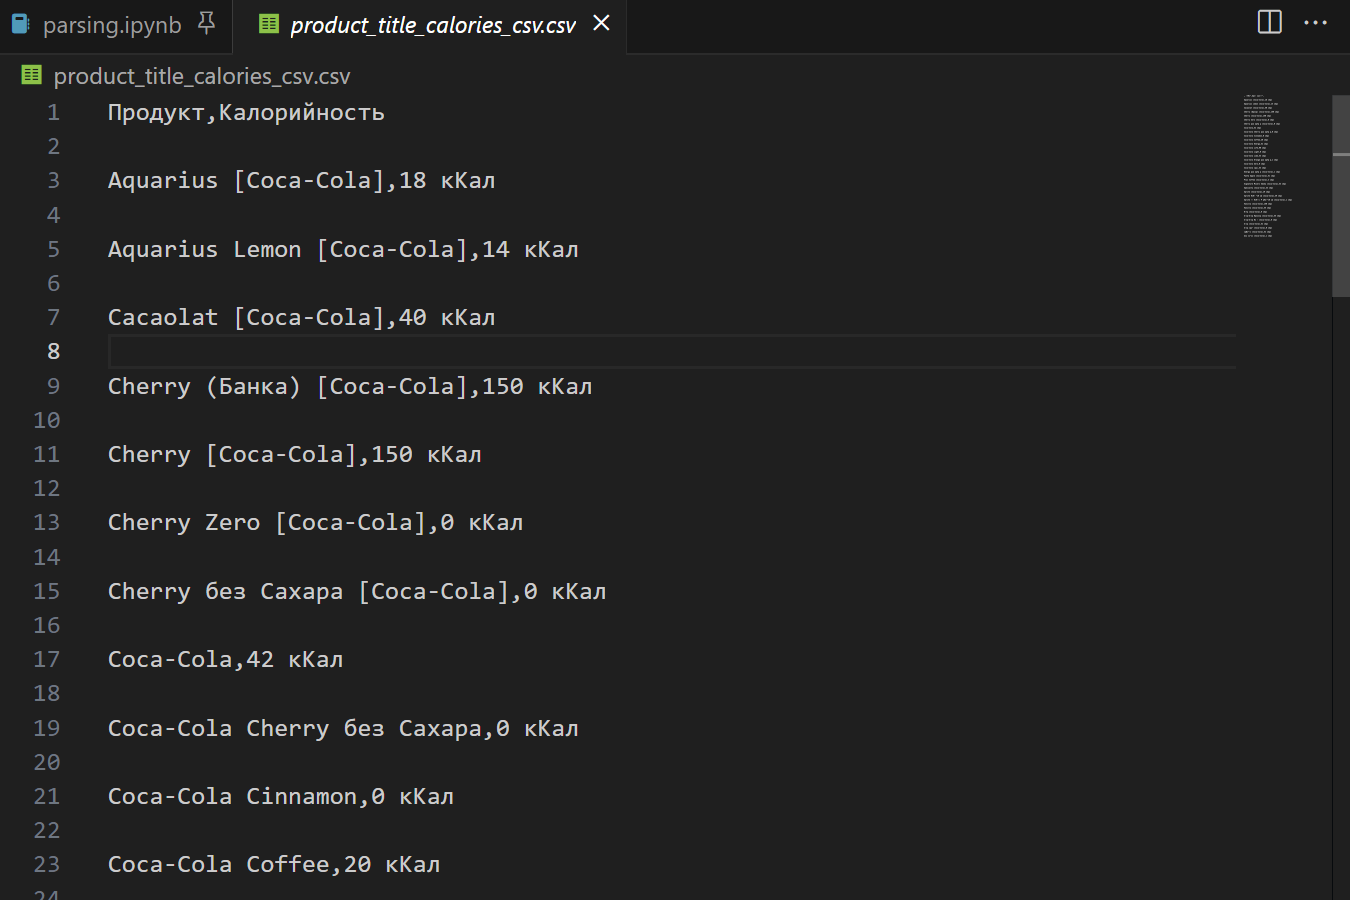

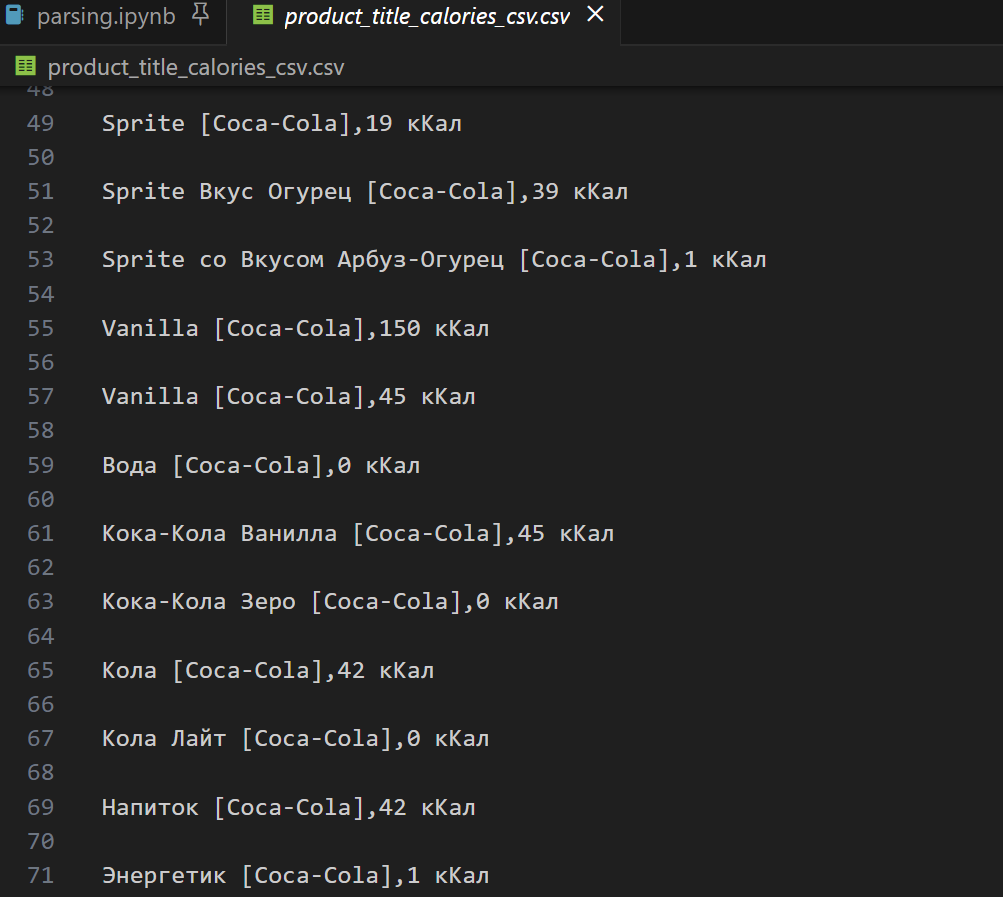